# Nathan Fernandes - CS 767

Homework 2

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
from  sklearn.datasets import  load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import math
from random import sample

# Problem 1.
## Building a Neural Network using Numpy and Pandas

Setting up the IRIS dataset:

In [2]:
iris = load_iris()

In [3]:
# Creating a Pandas Dataframe of the data

data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['Species'])

# Setting target names

data.loc[(data.Species == 0.0),'Species']= iris.target_names[0]
data.loc[(data.Species == 1.0),'Species']= iris.target_names[1]
data.loc[(data.Species == 2.0),'Species']= iris.target_names[2]

In [4]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Building a Single Layer Perceptron

In [5]:
# Splitting the dataset in Train and Test

X = data.iloc[:,[0, 1, 2, 3]].values
y = data.iloc[:,4].values
y = np.where(y=='setosa', 0, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## Batch Gradient Descent

In [34]:
# Final Batch

w = np.random.random(4)
b = np.random.random()

iterations = 1000
learning_rate = 0.001
N = 120


MSE_train = []
MSE_test = []

for i in range(0, iterations):

    z = np.dot(X_train, w) + b

    dw = (1/N) * np.dot(X_train.T , (z - list(y_train)))
    db = (1/N) * np.sum(z - list(y_train))

    w = w - learning_rate * dw
    b = b - learning_rate * db

    error_train = (1/N) * np.power(np.sum( z - y_train),2)
    
    z_test = np.dot(X_test, w) + b
    error_test = (1/N) * np.power(np.sum( z_test - y_test),2)

    MSE_train.append(error_train)
    MSE_test.append(error_test)

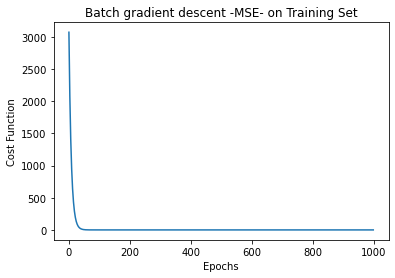

In [35]:
plt.plot(MSE_train)
plt.xlabel("Epochs")
plt.ylabel("Cost Function")
plt.title("Batch gradient descent -MSE- on Training Set")
plt.show()

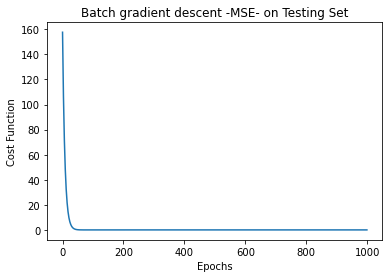

In [36]:
plt.plot(MSE_test)
plt.xlabel("Epochs")
plt.ylabel("Cost Function")
plt.title("Batch gradient descent -MSE- on Testing Set")
plt.show()

## Stochastic Gradient Descent

In [38]:
# Stochastic final

w = np.random.random(4)
b = np.random.random()

iterations = 1000
learning_rate = 0.001


MSE_stoch_train = []
MSE_stoch_test = []

for i in range(0, iterations):
    
    for j in range(0, N):
        
        z = np.dot(X_train[j], w) + b
        
        dw = (1/N) * np.dot(X_train[j], (z - (y_train[j])))
        db = (1/N) * np.sum(z - y_train[j])

        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        error = np.power(np.sum( z - y_train[j]),2)
        MSE_stoch_train.append(error)
        
        
    z_test = np.dot(X_test, w) + b 

    error_test = (1/N) * np.power(np.sum(z_test - y_test) ,2)
    MSE_stoch_test.append(error_test)  

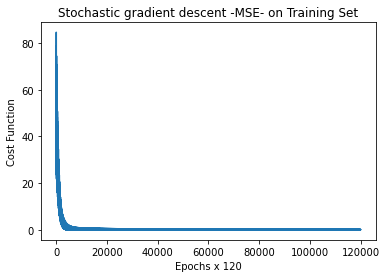

In [39]:
plt.plot(MSE_stoch_train)
plt.xlabel("Epochs x 120")
plt.ylabel("Cost Function")
plt.title("Stochastic gradient descent -MSE- on Training Set")
plt.show()

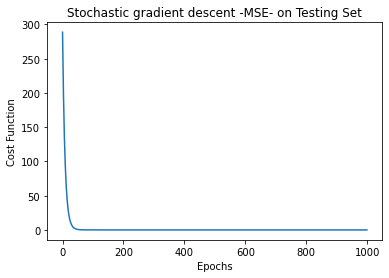

In [40]:
plt.plot(MSE_stoch_test)
plt.xlabel("Epochs")
plt.ylabel("Cost Function")
plt.title("Stochastic gradient descent -MSE- on Testing Set")
plt.show()

## Mini Batch Gradient Descent

In [41]:
def batchGenerator(X, Y, batch_size):
    
    a = []
    for i in range(X.shape[0]):
        a.append(i)
    
    batches_X = []
    batches_Y = []

    for i in range(int(X.shape[0] / batch_size)):
        mini = sample(a, batch_size)
        x_mini = X[mini, : ]
        y_mini = Y[mini]
        batches_X.append(x_mini)
        batches_Y.append(y_mini)

    return batches_X, batches_Y

In [62]:
# Mini Batch Final

w = np.random.random(4)
b = np.random.random()

iterations = 100
learning_rate = 0.001

MSE_mini_train = []
MSE_mini_test = []

for i in range(0, iterations):
    X_batch, y_batch = batchGenerator(X_train, y_train, 12)
    
    for j in range(0, 10):
        z = np.dot(X_batch[j], w.T) + b

        dw = (1/10) * np.dot(X_batch[j].T , (z - list(y_batch[j])).T)
        db = (1/10) * np.sum(z - list(y_batch[j]))

        w = w - learning_rate * dw.T
        b = b - learning_rate * db

        error_train = (1/10) * np.power(np.sum( z - y_batch[j]),2)
    
    MSE_mini_train.append(error_train)
    
    z_test = np.dot(X_test, w) + b
    error_test = (1/10) * np.power(np.sum( z_test - y_test),2)
    MSE_mini_test.append(error_test)

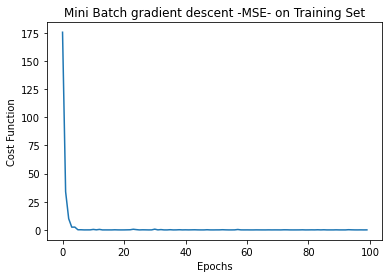

In [61]:
plt.plot(MSE_mini_train)
plt.xlabel("Epochs")
plt.ylabel("Cost Function")
plt.title("Mini Batch gradient descent -MSE- on Training Set")
plt.show()

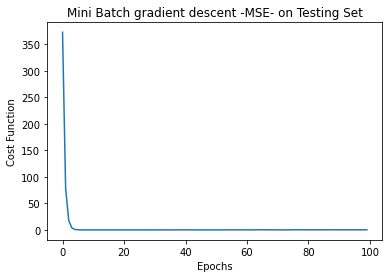

In [63]:
plt.plot(MSE_mini_test)
plt.xlabel("Epochs")
plt.ylabel("Cost Function")
plt.title("Mini Batch gradient descent -MSE- on Testing Set")
plt.show()

# Problem 2.
### Name two pros and cons of stochastics gradient descent:

### Advantages of Stochastic Gradient Descent

1. It is easier to fit in the memory due to a single training example being processed by the network and is computationally fast as only one sample is processed at a time.
3. For larger datasets, it can converge faster as it causes updates to the parameters more frequently.

### Disadvantages of Stochastic Gradient Descent

1. Due to frequent updates, the steps taken towards the minima are very noisy. This can often lean the gradient descent into other directions and it may take longer to achieve convergence to the minima of the loss function. Frequent updates are computationally expensive because of using all resources for processing one training sample at a time.
2. It loses the advantage of vectorized operations as it deals with only a single example at a time.